# 3.1 Stirling Engine

## Pre-Lab: Physical system modeling
Complete this before your first session in the lab. It is a good idea to go into the lab ahead of your actual working session and get a preview look at the apparatus while doing these exercises.

Before going any further, have a look at the part of the Wikipedia article on the Stirling Cycle that discusses the idealized Stirling cycle. (For now you need only look at this one short part of the article.)
https://en.wikipedia.org/wiki/Stirling_cycle#Idealized_Stirling_cycle_thermodynamics

Here we will label points in the cycle according to the following plot of pressure versus volume (pV diagram).

<img src="https://sites.google.com/site/experimentalphysicsdecathlon/home/03-thermal-and-statistical-physics/stirling-engine/Stirling%20pV%20diagram.jpg">


## Characterizing the Ideal Stirling Cycle 

### Estimating the number of moles, mass, and heat capacity of the air in the system
If the working fluid (air) of the system starts at room pressure $p_{room}$, maximum volume $V_{max}$ and temperature $T_{cold}$ what is the number of moles $n$ ? (Hint: the molar gas constant is $R$.)

In order to quantitatively explore the above question the following python cell will prompt you for four pieces of information:
1. The "cold" temperature, i.e. the temperature of the water bath.
2. The maximum volume of the working fluid, when the working piston is fully pushed out.
3. The local room pressure, which we will assume to be the pressure of the working fluid (air) when cold and at maximum volume inside the Stirling engine cyliner.
4. The elevation of Denver in meters (needed to provide pressure corrections).

To begin with, you can just estimate a reasonable value for the water bath temperature and then come back later to re-explore this section with an updated value from the experiment. 

To obtain an estimate of the maximum working fluid volume, see the apparatus documentation at http://www.ld-didactic.de/documents/en-US/GA/GA/3/388/388182e.pdf While you are looking at the apparatus specifications, also take note of the minimum working fluid volume.

There are two ways to obtain local barometric pressure. Use the first method for now and later when you are in the lab use the second method for comparison.
1. Look up the regional atmospheric pressure online. Here is a link to the current weather for Colorado: http://www.weather.gov/bou/ . Click on the map where you are located and find the barometric pressure in the resulting display. The problem is that the reported pressure is adjusted to sea-level equivalent using a model for the altitude dependence. This adjustment must be undone in the code below to estimate the actual room pressure. *To make this correction, you will also need to find the altitude $h$ of your location.*
2. *(Later in the lab)* Manually turn the flywheel until the working piston is at the bottom to give maximum volume and the displacement piston is raised so that most of the air is in the cold region of the cylinder. We will call this point "c" in the cycle. Directly measure the pressure using the sensor system and compare this to the value that you looked up, adjusted for altitude in the python code.

|Question *Q1*: What are values that you think you will use for bath temperature, maximum and minimum air volume of the engine cyclinder, sea-level equivalent of the local pressure, and local elevation? (You will need the minimum volume later...)|
|:---|

|Question *Q2*: What are formulas for the following? (a) The number of moles of air given the volume, temperature, and pressure. (b) The heat capacity at constant volume of the predicted quantity of air. (Hint: what kind of molecules make up the air and what does this imply about the heat capacity?)|
|:---|


### Numerical exploration
Run the code in the following cell, answering the prompts with the information that you obtained above, and obtain numerical estimates of the number of moles and the heat capacity. You are encouraged to explore a bit using different choices of parameters, but ultimately leave the output for your "best guess" of parameter values that describe the actual experiment.

In [1]:
# Code to estimate number of moles, mass, and heat capacity of the working volume of air
# DO NOT EDIT

R = 8.3144598 # molar gas constant in joules / (mole kelvin)
T0 = 273.15 # equivalent of 0°C in kelvin
airmolmass = 28.950 # weighted average of molecular mass of air

Tcold = float(input('What is the cooling jacket water temperature in °C? '))
Vmax = 1E-6*float(input('What is the maximum volume in cm^3? ')) # convert to m^3
proomSL = float(input('What is the current sea-level adjusted barometric pressure in mBar? '))
h = float(input('What is the elevation of your location in meters?  '))

# Now caculate the actual pressure for local altitude and current temperature.
# See http://keisan.casio.com/exec/system/1224579725
proom = 1.0E2*proomSL*(1-(0.0065*h)/(Tcold+T0+0.0065*h))**5.257 # formula for pressure conversion.
print(' ') #leave a blank liine
print('Predicted cold pressure at max volume is {0:.0f} Pa.'.format(proom))

# Estimate the number of moles using the ideal gas law, maximum volume, 
# pressure at point c equal to ambient room pressure, and cooling jacket water temperature.
pc = proom
nmoles = pc*Vmax/(R*(T0+Tcold))
print('Number of moles of air is {0:0.6f} moles.'.format(nmoles))

# Compute the corresponding mass
airmass = nmoles*airmolmass
print('Mass of air is {0:0.4f} grams.'.format(airmass))

# Compute the heat capacity at constant volume (assuming all molecules are diatomic)
Cvair = 5./2*nmoles*R
print('Heat capacity of air at constant volume = {0:0.4f} joules/K.'.format(Cvair))

What is the cooling jacket water temperature in °C? 20
What is the maximum volume in cm^3? 350
What is the current sea-level adjusted barometric pressure in mBar? 1008
What is the elevation of your location in meters?  1610
 
Predicted cold pressure at max volume is 83826 Pa.
Number of moles of air is 0.012037 moles.
Mass of air is 0.3485 grams.
Heat capacity of air at constant volume = 0.2502 joules/K.


### Interpretation

|Question *Q3*: Record the above dialog (input and output) as your answer to this question, putting a box around the number of moles of gas predicted to be the working fluid.|
|:---|

Notice how little material substance is actually used to effectively transduce thermal energy into what you will soon observe in the lab as mechanical motion of piston, piston rods, cams, crankshaft, and a massive flywheel. Let's now make a comparison to better appreciate the quantities involved.

|Question *Q4*: What are the corresponding values of moles, mass, and heat capacity for 1 cubic centimeter of liquid water at room temperature.|
|:---|


### Estimating the cold compressed pressure, the work of compression, and the heat removed

Now suppose we compress the gas while it remains in contact with the cold bath and thus stays at the cold temperature. The path from d to c is ideally an "isothermal compresson". The documentation says that the minimum volume at point c is about 200cc.

|Question *Q5*: Write down a formula and use it to make a prediction for the new pressure, given your estimates of the cold temperature and the number of moles of gas as well as the minimum volume suggested above. |
|:---|

(Later in the lab) Manually rotate the flywheel so that the air is compressed by the working piston while the air remains mostly in the cold region (i.e. the displacement piston does not move much). Call this point "d" in the cycle. Watch what happens to the pressure sensor reading. Compare the final value to your estimate above.

|Question *Q6*: Write down a formula for the work that you must do work manullay compressing the gas from point d to c., given your estimates of the cold temperature and the number of moles of gas as well as the minimum volume suggested above.|
|:---|

|Question *Q7*: Run the code below. Do the resulting pressure and work values match your predictions? Is the code "algorithm" in agreement with the formulas that you wrote down?|
|:---|


In [2]:
from math import *
Vmin = 1E-6*float(input("What is the minimum volume in cm^3? ")) # convert to m^3
pd=pc*Vmax/Vmin
print('Predicted compressed pressure is {0:.0f} Pa.'.format(pd))
Wcomp = nmoles*R*(Tcold+T0)*log(Vmax/Vmin)
print('Predicted work of compression is {0:.1f} joules.'.format(Wcomp))
Qcomp = Wcomp
print('Predicted thermal energy given to cooling bath is {0:.1f} joules.'.format(Qcomp))

What is the minimum volume in cm^3? 200
Predicted compressed pressure is 146696 Pa.
Predicted work of compression is 16.4 joules.
Predicted thermal energy given to cooling bath is 16.4 joules.


### Estimating the highest working fluid temperature achieved

After the cold working fluid is compressed isothermally (by removing the heat caused by the compression), the next step in preparing the system for operation is to displace the working fluid to the hot end of the cylinder by moving the displacement piston. Here it is assumed the gas volume remains the same but the gas moves to a new region where it can be heated. In this region, an electric heater is operated at a power level that you will set using a transformer to apply a known voltage $V_{heater}$. Later, during the experiment you will also measure the current $I_{heater}$.

Let's assume that the air is put into contact with a heater running at a power of $P_{heater}$ watts for a time $t_{startup}$. What are the expected final temperature $t_{hot}$ and pressure $p_a$?

Here we need to be a bit more careful: in the actual apparatus, there is an initial heating time during which the walls of the apparatus near the heater become hot. Eventually a steady-state is reached so that the rate of thermal energy put in by the electric heater is balanced by the rate of thermal energy conducting through the walls, radiated out from the glow of the coil and radiation from the walls, and - last but not least - absorbed in gas when it has moved to the hot region. We need a simple but effective model for the last part of this.

Let's assume that when the engine is running, during the short time the gas is in the hot region held at nearly constant volume, most of the input power is absorbed by the gas since it is in direct contact with the coil. You will see in the experiment that about 12 volts of heater voltage cause about 12 amps of current to flow, for a power of 12 volts x 12 amps = 144 watts. The engine runs at about two or three strokes per cycle, so let's estimate a period of 1/2 second per cycle. Only about one-fourth of this cycle is the time in which the gas is at nearly constant volume in contact with the heater: about 1/4 x 1/2 = 1/8 second. So we estimate that a power of 144 watts is giving thermal energy to the gas in each cycle for about 1/8 = 0.125 second.

(Note: the engine may run a bit faster than this because the gas can also absorb thermal energy from the walls of the hot region during the short interval that the gas is in this region. Thus the gas needs less time to aquire the energy needed to keep the cycle running in steady state. The thermal energy extracted from the walls is then restored by the heater during the remainder of the cycle.)

|Question *Q8*: Using this estimate of power and duration of heating, how much energy is put into the gas by the heater?|
|:---|

|Question *Q9*: Using the formula for heat capacity in your answer to Question Q2b, estimate the new temperature of the air at point a that is reached after the air has been heated using the estimated power for the estimated time.|
|:---|

|Question *Q10*: Run the code below and see if its results agree with your estimates. Examine the lines of code that do the calculations and see if they make sense in comparison with your formulas for doing your own calculations.|
|:---|


In [12]:
Pheater = float(input("What is the heater input power in watts? "))
theater = float(input("What is the heating time in seconds? "))
Qheater = Pheater*theater
print('Computed thermal energy transferred by heater is {0:.0f} joules.'.format(Qheater))
Qisochor = Qheater #Assume that during the short interval that the
# gas is in the hot region all of the thermal energy from the heater goes
# to the gas after it has been displaced at constant volume (isochor) 
# through the regenerator into this region.
Thot = Tcold+Qisochor/Cvair
print('Estimated hot gas temperature is {0:.1f} °C.'.format(Thot))
pa = pd*((Thot+T0)/(Tcold+T0))
print('Estimated hot gas pressure is {0:.0f} Pa.'.format(pa))

What is the heater input power in watts? 144
What is the heating time in seconds? 0.125
Computed thermal energy transferred by heater is 18 joules.
Estimated hot gas temperature is 91.9 °C.
Estimated hot gas pressure is 182696 Pa.


(Later in the lab): Having compressed the gas at cold temperature to reach point b,  manually rotate the flywheel further so that the displacement piston pushes most of the air to the end of the cylinder containing the heater. Turn on the heater for about 30 seconds and watch what happens to the pressure. Then give the flywheel a push to hopefully set the heat engine into continuous function.

Our expectation here is that after heat is put into the air, it will expand. We model the expansion as an isothermal process happening at the estimated hot temperature from above, going from the minimum volume back to the maximum volume.

|Question *Q11*: write down a formula for the work done by the gas in this isothermal expansion from point a to point b. Use your formula to make a quantitative estimate of this work.|
|:---|

|Question *Q12*: run the code below and compare both the statements in the code with your formula and the numerical result with your estimate.|
|:---|


In [13]:
# Now calculate work done in isothermal expanson
Wexp = nmoles*R*(Thot+T0)*log(Vmax/Vmin)
print('Predicted work of expansion is {0:.1f} joules.'.format(Wexp))
Qexp = Wexp
print('Predicted thermal energy absorbed from heater is {0:.1f} joules.'.format(Qexp))

Predicted work of expansion is 20.4 joules.
Predicted thermal energy absorbed from heater is 20.4 joules.


### Congratulations!

We have talked our way through one cycle, although usually (as in the Wikipedia article) the cycle is assumed to start at point a, go to b, then c, then d. The reason we started at c, then went to d, then a the b is that this is a way to first run the system partially by hand while watching the sensor readings. In the experiment, you'll let the system keep running and let a computer continuously record the sensor data. But this first piece-by-piece walk through is meant to gain some insight into what the process is doing in each cycle.

The following code will plot the expected pressure versus volume characteristic for an entire cycle. Run the code to get a plot using the quantitative estimages obtained above. Study the code to see how the plotting is set up. (NOTE: the colors blue and red may be switched until the code is enhanced to provide the colors matching the figure at the top of this document.)

Library import complete.


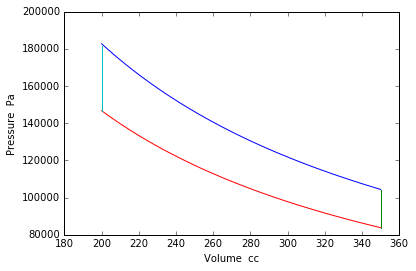

In [14]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
print('Library import complete.')
Vmincc=1E6*Vmin # convert cubic meters to cubic centimeters
Vmaxcc=1E6*Vmax # convert cubic meters to cubic centimeters
vab = np.arange(Vmincc,Vmaxcc,1)
pab = pa*Vmincc/vab
# Recall that pc was assumed to be proom, the pressure in the lab room
pb = pc*(Thot+T0)/(Tcold+T0)
pbc = np.arange(pc,pb,1000)
npbc= len(pbc)
vbc = Vmaxcc*np.ones(npbc)
vdc = vab
pdc = pd*Vmincc/vdc
pda = np.arange(pd,pa,1000)
npda = len(pda)
vda = Vmincc*np.ones(npda)
plt.plot(vab,pab,vbc,pbc,vdc,pdc,vda,pda)
plt.xlabel('Volume  cc')
plt.ylabel('Pressure  Pa')
plt.show()

## Efficiency

Finally, we want to know how the net work done in one cycle compares to the energy input required from the heater. Along the way, we will introduce and explore the operation of an important element called the regenerators. The main idea is that a 100% regenerator is capable of absorbing all of the change in thermal energy of the gas when it goes from point b to point c (constant volume cooling) and then gives all of this stored thermal energy back in  going from point d to a (constant volume heating). A 60% effective regenerator only absorbs and restores 60% of the change in thermal energy with the remaining thermal energy being lost to the cooling bath, reducing the overall efficiency. A 0% effective regenerator means that all of the change in thermal energy must be dumped into the bath in going from b to c and thus none is recovered in going from d back to a.

NOTE: AT THIS POINT (Jan 20, 2017) more needs to be added to the document. You can run the code segments below to see what effiencies are obtained as a result of different values of the regenerator effectiveness, ranging from 0% to 100%. You can run the code many times, each time using a different value of the effectivenes as an input.

In [15]:
# Now calculate efficiency.
regeneff = 0.01*float(input("What is the %effectiveness of the regenerator? "))
Wnet = Wexp-Wcomp # net work done
Qnet = Qexp+(1-regeneff)*Qisochor
Carnoteff = 1-(Tcold+T0)/(Thot+T0)
Actualeff = Wnet/Qnet
print('Net work done in one cycle is {0:0.1f} joules'.format(Wnet))
print('Net heat absorbed in one cycle is {0:0.1f} joules'.format(Qnet))
print('Carnot efficiency is {0:.1f} %.'.format(100*Carnoteff))
print('Actual efficiency is {0:.1f} %.'.format(100*Actualeff))
# print('Predicted heating time is {0:0.2f} seconds.'.format(Qnet/Pheater))

What is the %effectiveness of the regenerator? 0
Net work done in one cycle is 4.0 joules
Net heat absorbed in one cycle is 38.4 joules
Carnot efficiency is 19.7 %.
Actual efficiency is 10.5 %.


## Future parts of the document

The segments below are for future use and may be ignored for now.

In [8]:
ccopper = 0.385 # J/gK specific heat of copper at 25°C
mcopper = float(input('What is the estimated mass of the copper regenerator in grams? '))
Cregen = mcopper*ccopper
print('Estimated heat capacity of copper regenerator Cregen = {0:0.4f} joules/K.'.format(Cregen))
print('Heat capacity ratio Cvair/Cregen = {0:0.5f}'.format(Cvair/Cregen))

What is the estimated mass of the copper regenerator in grams? 10
Estimated heat capacity of copper regenerator Cregen = 3.8500 joules/K.
Heat capacity ratio Cvair/Cregen = 0.06953


In [38]:
mweighted = 0.7809*28.013+.2095*31.999+0.0093*39.948
print(mweighted)
n=1000/mweighted
nN2=n*.7809
nO2=n*.2095
nAr=n*0.0093
print(n,nN2,nO2,nAr)
CV=(5./2)*(nN2+nO2)*R+(3./2)*nAr
print("CV=",CV)
CP=(7./2)*(nN2+nO2)*R+(5./2)*nAr
print("CP=",CP)

28.950658600000004
34.54152853020069 26.97347962923372 7.236450227077044 0.3212362153308664
CV= 711.5745707007854
CP= 996.3328934672319


In [16]:
m=27.17*28+7.29*32+.32*18
print(m)

999.8
